### CUNY Hackathon: Analyzing the risk and returns of stocks

In [388]:
#Import required libraries
!pip install iexfinance
!pip install pyEX
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from scipy import stats
import seaborn as sns

from iexfinance.stocks import Stock
import pyEX as p


symbol = input('Please enter the stock you are interested in:')

Please enter the stock you are interested in:AAPL


In [389]:
c= p.Client(api_token = 'Tpk_3cd1f8cfeb4a4f849c4b5688a752e3d4', version = 'sandbox')

In [390]:
def get_data(symbol):
    global stock
    stock = c.chartDF(symbol, timeframe = '5y')
    global stock_df
    stock_df= stock[['open', 'close', 'high', 'low', "volume"]]
    
    return stock_df

In [391]:
stock = get_data(symbol)
stock.head()

,open,close,high,low,volume
date,,,,,
2021-01-22,138.22,145.37,143.1300,136.540,118243050
2021-01-21,135.40,141.52,145.8700,133.790,122572080
2021-01-20,130.67,134.74,136.1100,134.930,107201046
2021-01-19,128.56,128.01,132.2500,130.885,92039899
2021-01-15,131.00,132.18,134.2967,133.000,113429519


In [392]:
SP500= pdr.get_data_yahoo("^GSPC",
                          start = "2016-01-25",
                          end= "2021-01-22")

In [393]:
SP500= SP500.sort_index(ascending = False)

## 2. Graph the closing price over the years

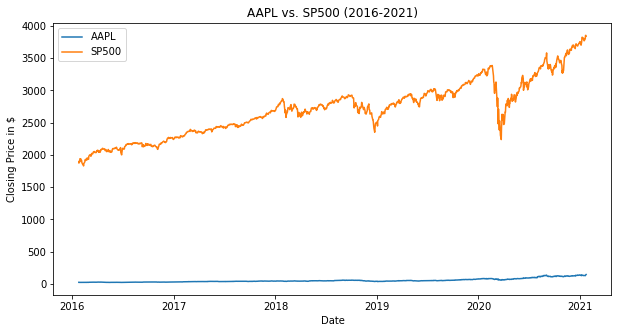

In [394]:
#Define the x and y labels for the graph

plt.figure(figsize= (10,5))

x = stock.index         #Date
y= stock['close']   #Price

x1= SP500.index
y1= SP500['Close']

plt.xlabel("Date")
plt.ylabel("Closing Price in $")

plt.plot(x,y)
plt.plot(x1,y1)
plt.title(f"{symbol} vs. SP500 (2016-2021)")
plt.legend([f"{symbol}", "SP500"])

##### Clearly, this does not give us a good comparison. We have to calculate the % change.

## 3. Calculate the monthly and daily percentage change

In [395]:
#Calculate the percentage change of the adjusted close, including all rows 
#but the first one (daily& monthly)
stock_daily_returns = stock['close'].pct_change()[1:]
stock_monthly_returns= stock["close"].resample("M").ffill().pct_change()

SP500_daily_returns = SP500["Close"].pct_change()[1:]
SP500_monthly_returns= SP500["Close"].resample("M").ffill().pct_change()

In [396]:
SP500_daily_returns.head()

Date
2021-01-21    0.003020
2021-01-20   -0.000317
2021-01-19   -0.013744
2021-01-15   -0.008071
2021-01-14    0.007242
Name: Close, dtype: float64

## 4. Plot the monthly returns of the stock and the SP500

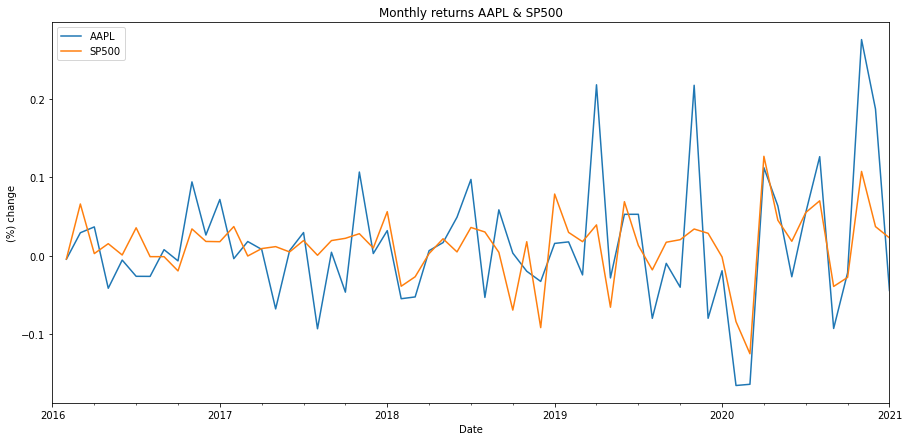

In [397]:
plt.figure(figsize= (15,7)) 
tsla_monthly_returns.plot()
SP500_monthly_returns.plot()

plt.xlabel("Date")
plt.ylabel("(%) change")
plt.title(f"Monthly returns {symbol} & SP500")
plt.legend([f"{symbol}", "SP500"])
plt.show()

Based on the graph, Tesla looks like an **aggressive** stock (Beta>1) but we still have to calculate it.

### 5. Graph the monthly returns of the stock vs. SP500 returns

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


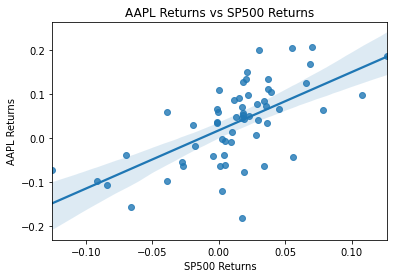

In [398]:
fig, ax = plt.subplots()

sns.regplot(SP500_monthly_returns.values,
stock_monthly_returns.values)
plt.xlabel("SP500 Returns")
plt.ylabel(f"{symbol} Returns")
plt.title(f"{symbol} Returns vs SP500 Returns")
plt.show()

Interpretation: This graph illustrates the relationship between the returns of Tesla and the returns of S&P 500. The slope of the line is pretty flat and means that the beta is not very high. The scatter around the line explains the firm's specific risk. The further the points from the line indicate a higher firm-specific risk.

## 6. Calculate the Beta and Alpha Value of the stock against SP500

In [399]:
(beta, alpha) = stats.linregress(SP500_daily_returns, tsla_daily_returns.values)[0:2]

In [400]:
print (f"{symbol} is considered an aggressive stock, because its beta value \nis", round(beta, 3),
      "and its alpha is ", round(alpha, 3))

AAPL is considered an aggressive stock, because its beta value 
is 0.965 and its alpha is  0.0


## 8. Find the Standard deviation on monthly returns

In [401]:
def get_data2(symbol):
    global stock2
    stock2 = c.chartDF(symbol, timeframe = '1y')
    global stock_df2
    stock_df2 = stock2[['open', 'close', 'high', 'low', "volume"]]
    
    return stock_df2

print(get_data2(symbol))

                open     close      high       low     volume
date                                                         
2021-01-22  137.3500  140.0200  141.7300  136.3800  117792933
2021-01-21  138.4000  138.6500  143.8800  135.2700  123196238
2021-01-20  129.3100  133.7100  138.0200  130.5500  108371923
2021-01-19  131.7400  128.0000  131.8500  129.3710   91930256
2021-01-15  134.2300  131.8600  135.6232  132.0000  113744504
...              ...       ...       ...       ...        ...
2020-01-30   82.6682   83.5738   84.3717   83.4533  130340688
2020-01-29   83.9287   84.6330   82.9867   83.7930  220225297
2020-01-28   80.3900   83.0435   82.8000   79.4148  166216964
2020-01-27   78.8990   80.6769   81.3568   77.0200  162084835
2020-01-24   82.4905   81.0918   81.6747   80.1871  151765734

[252 rows x 5 columns]


In [402]:
print(f"Standard Deviation {symbol}:", round(stock_monthly_returns.std(),3))

Standard Deviation AAPL: 0.09


The Standard Deviation shows us the volatility of the Tesla's stock. The higher the std, the more volatile. With 18% the stock is in the lower area of volatility which is most likely related to the constant growth over the past 5 years.

In [403]:
!pip install sklearn

### First, we must check if there is a linear relationship between the closing and the opening price using a Scatter plot

To predict the closing price based on the opening price, there has to be a strong linear relationship.

Text(0, 0.5, 'Close Price')

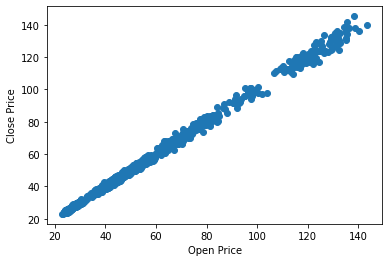

In [404]:
plt.scatter(stock.open, stock.close)
plt.xlabel("Open Price")
plt.ylabel("Close Price")

In [405]:
import numpy as np
from sklearn import preprocessing

stock_df2 = stock_df2[['close']]

forecast_price = int(30)

stock_df2['Prediction'] = stock_df2[['close']].shift(-forecast_price)

print(stock_df2.tail())

X = np.array(stock_df2.drop(['Prediction'], 1))

X = preprocessing.scale(X)

              close  Prediction
date                           
2020-01-30  83.5738         NaN
2020-01-29  84.6330         NaN
2020-01-28  83.0435         NaN
2020-01-27  80.6769         NaN
2020-01-24  81.0918         NaN


In [406]:
X_forecast = X[-forecast_price:] # set X_forecast equal to last 30
X = X[:-forecast_price]

y = np.array(stock_df2['Prediction'])
y = y[:-forecast_price]

In [407]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = LinearRegression().fit(X_train,y_train)

print(f'The model accuracy for {symbol} is:', clf.score(X_test, y_test))

clf.predict(X_forecast)


The model accuracy for AAPL is: 0.6657979727779837


array([74.30734134, 73.5462954 , 77.28191487, 74.35517407, 74.16633201,
       69.38523687, 69.1052404 , 73.46696307, 72.69075065, 75.36782794,
       78.5477322 , 79.00078204, 80.1518786 , 80.55398463, 81.39140738,
       79.14350245, 81.17619899, 79.00054871, 81.41722928, 78.69029707,
       81.63492653, 79.57819696, 80.39633107, 78.12968193, 78.14313732,
       80.92249109, 81.7463029 , 80.51004074, 78.66937511, 78.99207103])